## Ford Gobike Data Exploration

### By Mohamed Elkomy

#### Table of Content

- Preliminary Wrangling
- Univariate Exploration
- Bivariate Exploration
- Multivariate Exploration
- Conclusion

### Preliminary Wrangling

This document explores a dataset containing the trip data of the Ford Gobike.

In [429]:
# inserting the libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 


In [430]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [431]:
df.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

In [432]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [433]:
#change the data type of (start_time and end_time to datetime).
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [434]:
#change the type of bike_share_for_all_trip to be a boolean value
df.bike_share_for_all_trip = (df.bike_share_for_all_trip == "Yes")

In [435]:
df['member_age'] = 2019 - df['member_birth_year']

In [436]:
df['duration_min']=df['duration_sec']/60

In [437]:
df.describe(),df.info(),df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

(        duration_sec  start_station_id  start_station_latitude  \
 count  183412.000000     183215.000000           183412.000000   
 mean      726.078435        138.590427               37.771223   
 std      1794.389780        111.778864                0.099581   
 min        61.000000          3.000000               37.317298   
 25%       325.000000         47.000000               37.770083   
 50%       514.000000        104.000000               37.780760   
 75%       796.000000        239.000000               37.797280   
 max     85444.000000        398.000000               37.880222   
 
        start_station_longitude  end_station_id  end_station_latitude  \
 count            183412.000000   183215.000000         183412.000000   
 mean               -122.352664      136.249123             37.771427   
 std                   0.117097      111.515131              0.099490   
 min                -122.453704        3.000000             37.317298   
 25%                -122.41240

#### What is the structure of the dataset?

There are 183,412 bike trip in the dataset with 16 features (start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,
end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip), thats before adding another 2 featuers.
Most variables are numeric in nature, noting that out of 18 specifications 9 are numerical, 2 are datetime, 4 are object type and 1 has been converted to a boolean type.

#### What is/are the main feature(s) of interest in the dataset?

I'm most interested in figuring out what features are best for predicting the tirp durations in the dataset.

#### What features in the dataset do I think will help support my investigation into the feature(s) of interest?

For sure the trip duration is highly dependes on the start stations and end stations, additionally more crowded places should receive more rides so, some stations should be logging more durationin sec. I also think user_type, age (birthday) and gender should also effect trip duration.

### Univariate Exploration

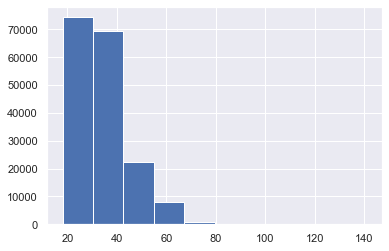

In [438]:
# start with a standard-scaled plot
age_bins = np.arange(0, df['member_age'].mean())
plt.hist(data= df, x = 'member_age');

Most of the users are between age 20th and 40th.

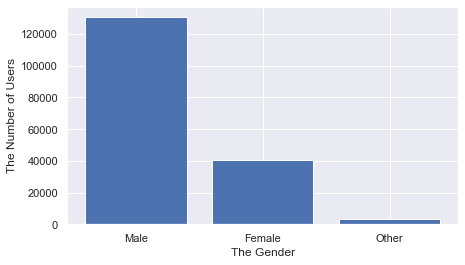

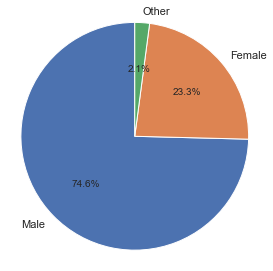

In [439]:
# plotting the genders in 2 times percentage and disruption
(plt.figure(figsize=[7,4]))
plt.bar(x = df.member_gender.value_counts().keys(), height = df.member_gender.value_counts())
plt.xlabel('The Gender')
plt.ylabel('The Number of Users')
plt.show()

plt.figure(figsize = [10, 5])
plt.subplot(1,2,1)
Sg = df['member_gender'].value_counts()
plt.pie(Sg, labels=Sg.index, startangle = 90, autopct = '%1.1f%%')
plt.axis('square');

According to the mentioned charts the proportion of males is significantly higher than the other genders.

But what about (the start - the end ) stations in the dataset ?

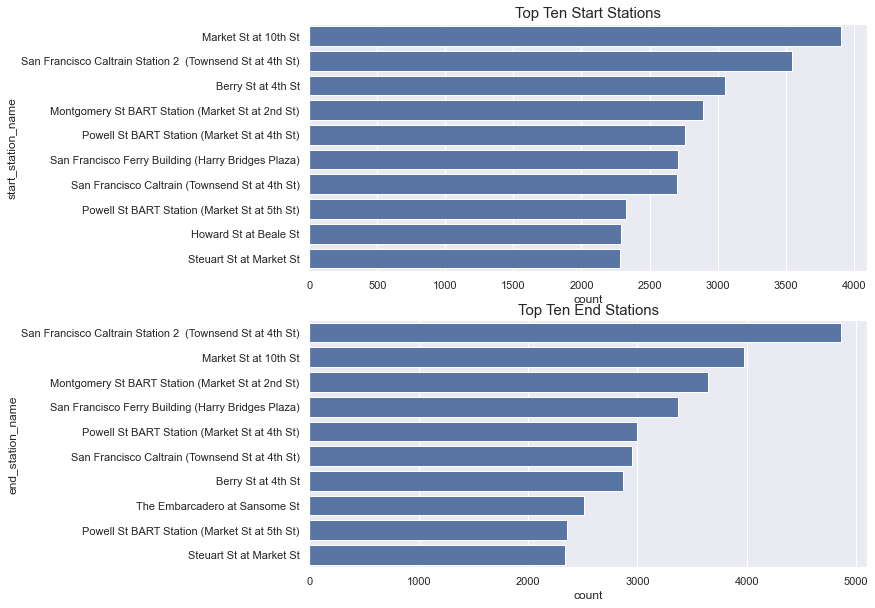

In [440]:
bc = sns.color_palette()[0]
plt.figure(figsize = [10, 10])
plt.subplot(2,1,1)
start_order = df['start_station_name'].value_counts()[:10]
df_start = df.loc[df['start_station_name'].isin(start_order.index)]
sns.countplot(data = df_start, y = 'start_station_name', order = start_order.index, color = bc)
plt.title('Top Ten Start Stations', size= 15)
plt.subplot(2,1,2)
end_order = df['end_station_name'].value_counts()[:10]
df_end = df.loc[df['end_station_name'].isin(end_order.index)]
sns.countplot(data = df_end, y = 'end_station_name', order = end_order.index, color = bc)
plt.title('Top Ten End Stations', size= 15);

According to the mentioned top 10 charts Market Street, and Caltrain Station San Francisco are the highest starting and destination stations.

In [441]:
df['duration_min'].min(), df['duration_min'].mean(), df['duration_min'].max()

(1.0166666666666666, 12.10130725724969, 1424.0666666666666)

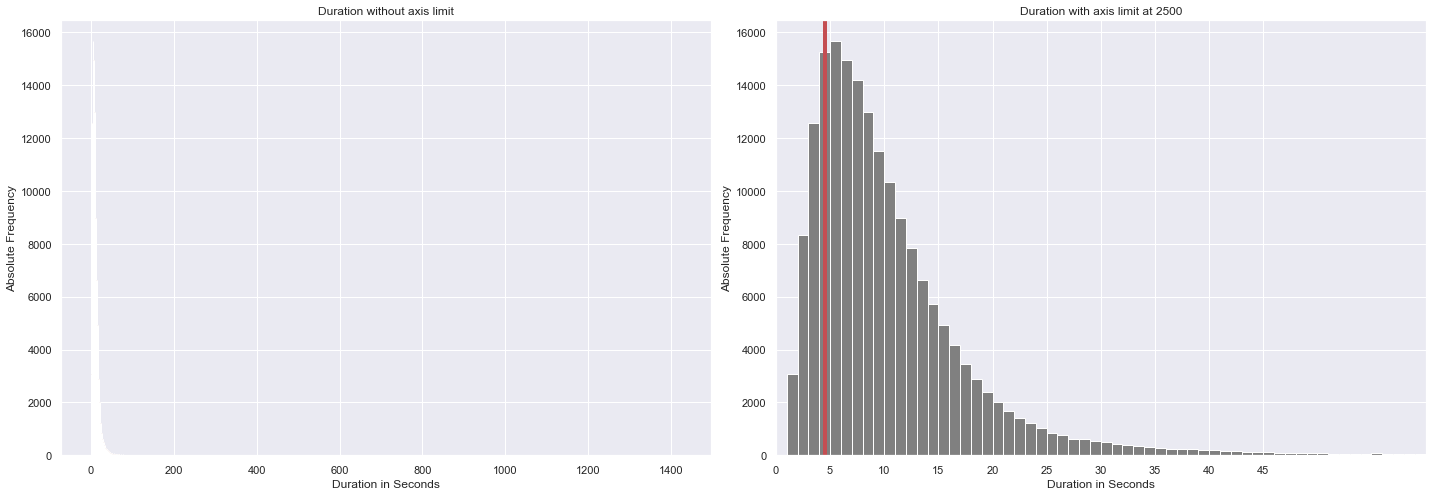

In [442]:
m = df['duration_min'].mode().tolist()

plt.figure(figsize=(20,7))

# plotting the distribution of the duration without any axis limits first
plt.subplot(1,2,1)
bins = np.arange(0, df['duration_min'].max()+1, 1)
plt.hist(data = df, x = 'duration_min', bins = bins, color = 'darkred')
plt.title('Duration without axis limit')
plt.xlabel('Duration in Seconds')
plt.ylabel('Absolute Frequency')

# since we have a widely spread distribution
plt.subplot(1,2,2)
bins = np.arange(0, df['duration_min'].max()+1, 1)
plt.hist(data = df, x = 'duration_min', bins = bins, color = 'gray')
plt.title('Duration with axis limit at 2500')
plt.xlabel('Duration in Seconds')
plt.ylabel('Absolute Frequency')
plt.xticks(np.arange(0, 50, 5))
plt.axvline(x=m, color='r', lw=4)
plt.xlim(0, 60)

plt.tight_layout();

### Discussing the distributions of the interest variables .

I looked at it in log transformation due to lots of trip duration takes a large amount of values, and it's fixed on the tail,and found that the peak occurs then the distribution starts to drop and nothing recovers any more of the peak value.

### Of the features I investigated, were there any unusual distributions? Did I perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did I do this?

The year of birth is converted by substituting the year from the current year, so this gives us a distortion of the age, and this procedure is performed as the age gives a better visualization in relation to the duration of the journey. The starting and ending station are also plotted in a larger diagram because it gives a better view regarding bicycle traffic at certain stations.

### Bivariate Exploration

First let's have a look at the correlation between trip duration and age

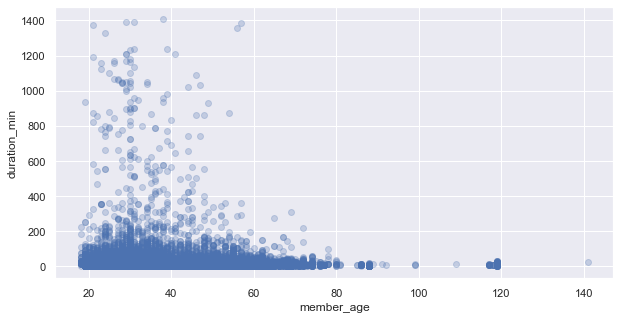

In [443]:
plt.figure(figsize = [10,5])
plt.scatter(x = df['member_age'], y = df['duration_min'], alpha = 0.25)
plt.xlabel("member_age")
plt.ylabel("duration_min");

second let's have a look at the correlation between gender and type of the user

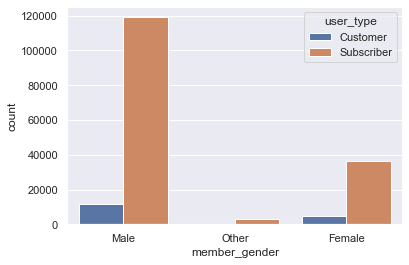

In [444]:
sns.countplot(data = df, x = 'member_gender', hue = 'user_type');

Acording to the mentioned plot we can say that most of the subscipers are males.

Whats is the duration reliance on the gender and the member type ?

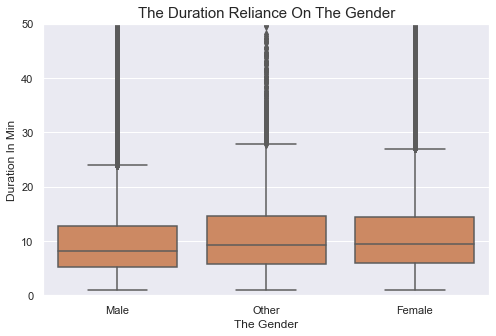

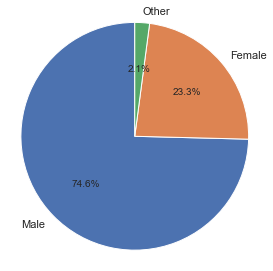

In [445]:
plt.figure(figsize = [8, 5])
base_color = sns.color_palette()[1]
sns.boxplot(data = df, x = 'member_gender', y = 'duration_min',color=base_color)
plt.ylim([0, 50])
plt.title('The Duration Reliance On The Gender',size=15)
plt.xlabel('The Gender')
plt.ylabel('Duration In Min')
plt.show()

plt.figure(figsize = [10, 5])
plt.subplot(1,2,1)
Sg = df['member_gender'].value_counts()
plt.pie(Sg, labels=Sg.index, startangle = 90, autopct = '%1.1f%%')
plt.axis('square');

According to these plots, the trips duration for some stations as start station is higher, also, for some stations as end station is higher. so, what is the stations result in starting of longer trips and what stations comes end of longer trips.

Whats is the duration reliance on the gender and the member type ?

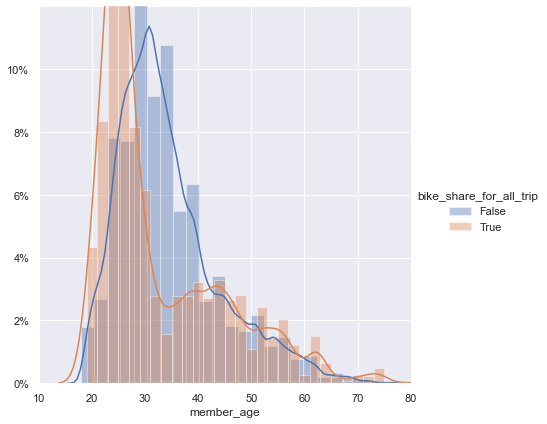

In [446]:
sns.FacetGrid(df,hue='bike_share_for_all_trip',size=6).map(sns.distplot,'member_age').add_legend()
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.axis([10, 80, 0, 0.06]);

As i thought quantity of young riders are very high than the older, the mentioned chart proof that higher percentage of younger share most of the trip.

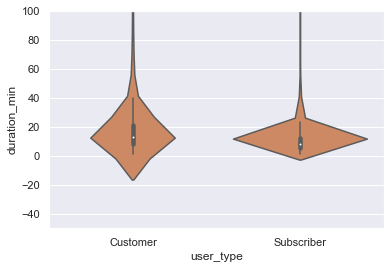

In [447]:
sns.violinplot(x='user_type', y='duration_min', data=df, size=8,style="",innner=None,color=base_color,)
plt.ylim([-50, 100]);

considering the mentioned plots that, higher number of customers are taking longer trips then compared to subscribers.

#### Talk about some of the relationships I observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The duration of the flight is highly dependent on the age of the member, and I didn't expect that in much of a dependency. On the other hand, the starting station and the final station do not determine the duration of the trip very much as i mentioned before. It just indicates that some start stations have higher trip durations as start point and some end stations have higher trip durations as end point.

#### Did I observe any interesting relationships between the other features (not the main feature(s) of interest)?

I expected categorical variable like user type and gender values to have higher value for longer flight duration but the opposite is true for gender the value of male members is very high but the percentage of female members taking longer trips is higher.

### Multivariate Exploration

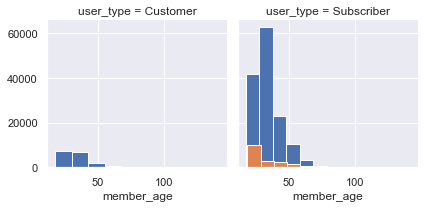

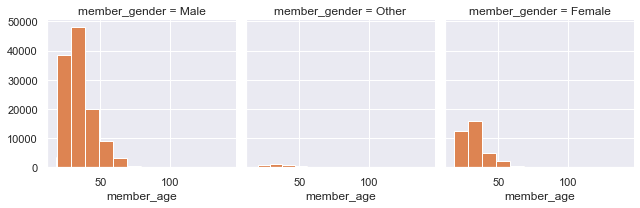

In [448]:
g = sns.FacetGrid(data = df, col = 'user_type', hue = 'bike_share_for_all_trip')
g.map(plt.hist, 'member_age'),

H = sns.FacetGrid(data = df, col = 'member_gender', hue = 'user_type')
H.map(plt.hist, 'member_age');

As observed subscribers percentage is higher than customers regardeless of the gender, and young ages between 20 ~ 40 dominate all data

I want to check some of bases in the dataset to make it more clear to me, which is visualize member type, age and gender.

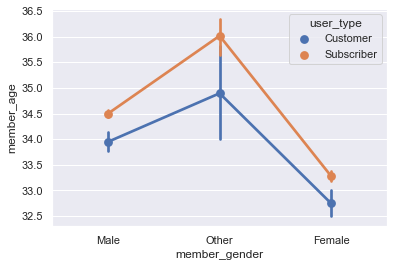

In [449]:
fig = plt.figure(figsize = [6,4])
ax = sns.pointplot(data = df, x = 'member_gender', y = 'member_age', hue = 'user_type')
plt.show();

Average customers age is 34 years old and subscribers are 36 years old, also the younger gender avrage is females.

#### Talk about some of the relationships I observed in this part of the investigation. Were there features that strengthened each other in terms of looking at my feature(s) of interest?

I observed that 
For different user types both are showing similer trends for age and trip duration. But there is slight tilt to higher age for subscribers having better trip duration.
though the number of higher duration trip is higher for male but percentage is higher for women and other.

#### Were there any interesting or surprising interactions between features?

I'm surprised of that the younger gender avrage is females.